# Визуализация в Python

## Основы Matplotlib

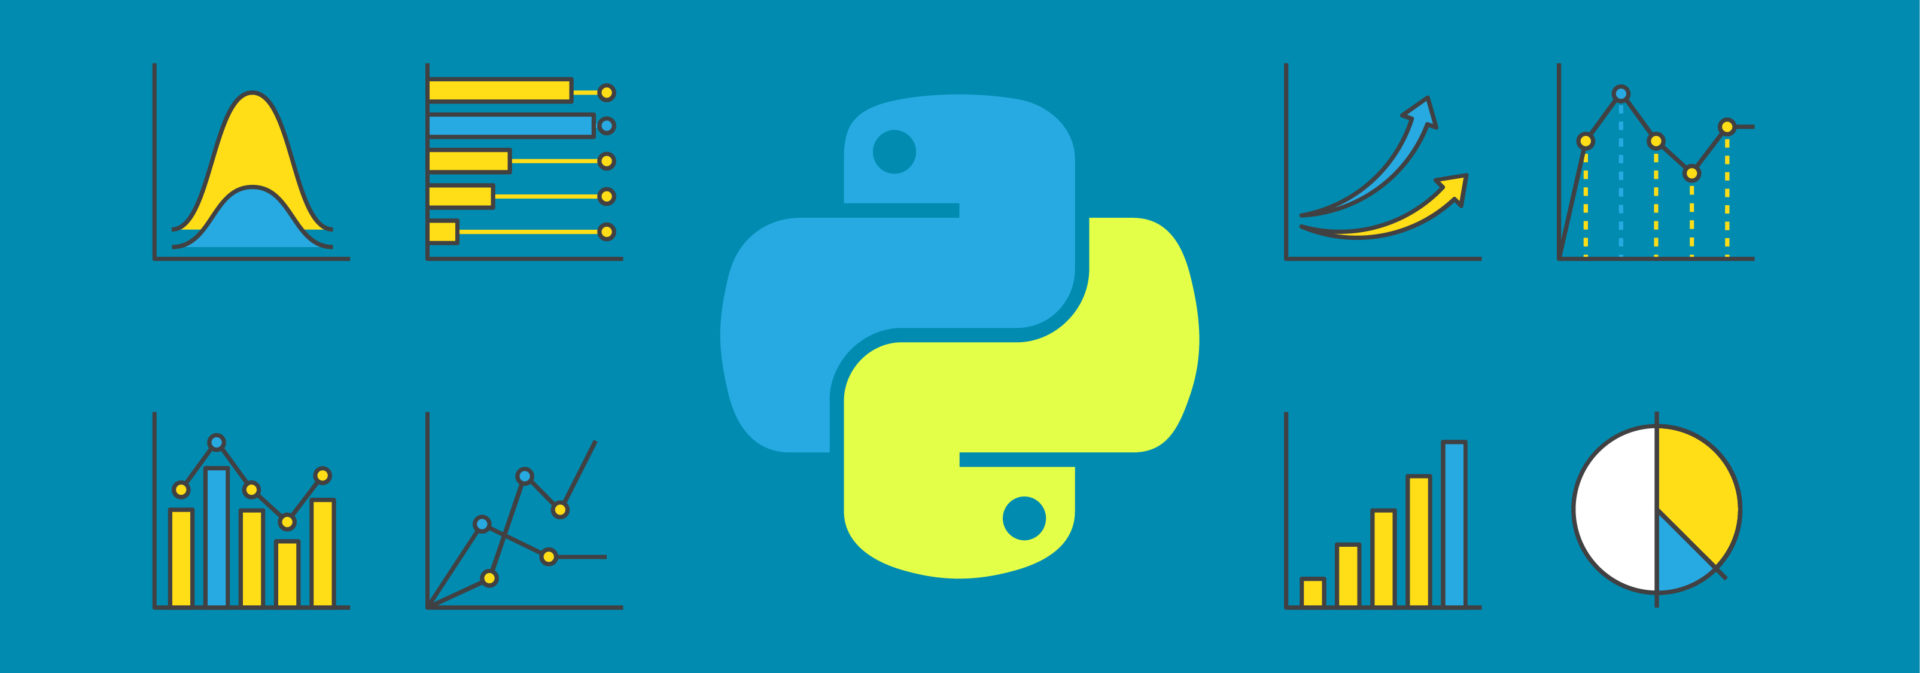

In [6]:
# Установка seaborn
pip install matplotlib

SyntaxError: invalid syntax (294135085.py, line 2)

In [ ]:
# https://matplotlib.org/stable/api/index.html
# Импорт библиотек
import matplotlib.pyplot as plt
import numpy as np # для работы с массивами


Figure - это контейнер самого верхнего уровня, та область на которой все нарисовано. Таких областей может быть несколько, каждая из которых может содержать несколько контейнеров Axes.


Axes - это та область на которой чаще всего и отражаются графики (данные в виде графиков), а так же все вспомогательные атрибуты (линии сетки, метки, указатели и т.д.). Часто, установка этой области сопровождается с вызовом subplot, который и помещает Axes на регулярную сетку. Поэтому, так же часто Axes и Subplot можно считать синонимами. Но с тем что это за сетка и как это размещение работает, давайте разберемся чуть ниже.

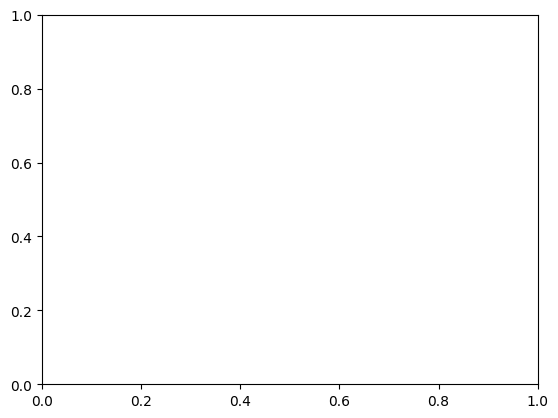

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

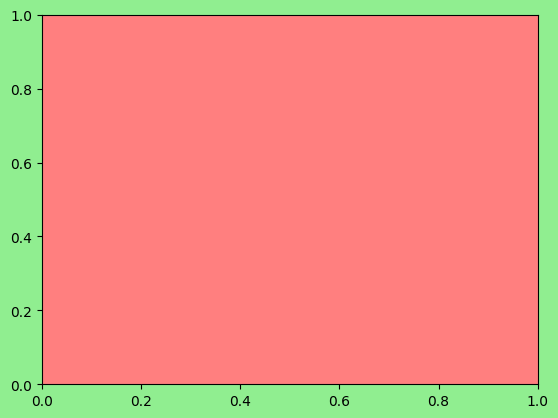

In [ ]:
# Создадим объекты Figure(plot) и Axes(subplot)
fig = plt.figure()
ax = fig.add_subplot()

fig.set(facecolor="lightgreen")
ax.set(facecolor="#FF7F7F");

In [ ]:
# Для наглядности создадим создадим Figure с 6-мя Axes
fig, axes = plt.subplots(2, 3)

In [ ]:
# Строим линейный график без явного создания объектов Figure и Axes
import matplotlib.pyplot as plt
import numpy as np # для работы с массивами

x = np.linspace(0, 30, 10)
y = x
plt.plot(x, y);

In [ ]:
# Построим линейный график
fig = plt.figure()
ax = fig.add_subplot()

x = np.linspace(0, 30, 10)
y = x

ax.plot(x, y, color="red", linestyle="--", label="legend_1")
#ax.legend()
#ax.grid()
#ax.set(title="График 1", xlabel="Ось x", ylabel="Ось Y");

In [ ]:
# График в 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

ax.plot(x, y, z, color="green", linestyle=":", label="parametric curve")
ax.legend()
ax.grid()
ax.set(title="График 1", xlabel="Ось x", ylabel="Ось Y", zlabel="Ось Z");
plt.show()

А где искать все эти параметры? 
Документация - https://matplotlib.org/stable/api/index.html 

In [ ]:
axes

In [ ]:
## Построение несколько графиков отдельно друг от друга (на разных полях)
fig, axes = plt.subplots(2, 2)

x = np.linspace(0, 30, 10)
y1 = x
y2 = [i**2 for i in x]
y3 = [-i**2 for i in x]
y4 = [np.sin(i) for i in x]

axes[0, 0].plot(x, y1)
axes[0, 1].plot(x, y2)
axes[1, 0].plot(x, y3)
axes[1, 1].plot(x, y4)

#for ax, y in zip(axes.flatten(), [y1, y2, y3, y4]):
#    ax.plot(x, y)

Различные виды графиков

In [ ]:
## стековый график
"""
Для построения стекового графика используется функция stackplot().
Суть его в том, что графики отображаются друг над другом, и каждый следующий является суммой предыдущего и заданного:
"""
fig, ax = plt.subplots()

x = [1, 2, 3, 4, 5]
y1 = [1, 1, 2, 3, 5]
y2 = [0, 4, 2, 6, 8]
y3 = [1, 3, 5, 7, 9]

ax.stackplot(x, y1, y2, y3, labels=['y1', 'y2', 'y3'], colors=['lightgreen', 'lightyellow', 'pink'])
ax.legend(loc='upper left');

In [ ]:
# точечный график
"""
Для построения точечного графика используется функция scatter(). Или все тот же plot() =)
"""
fig, ax = plt.subplots()

x = np.arange(0, 11, 0.2)
y = np.cos(x)
ax.plot(x, y, linestyle="-", linewidth=5)
#ax.scatter(x, y, c="red", s=10)


In [ ]:
# столбчатые диаграммы
"""
Для визуализации категориальных данных хорошо подходят столбчатые диаграммы. Для их построения используются функции:
bar() — вертикальная столбчатая диаграмма;
barh() — горизонтальная столбчатая диаграмма;
"""
fig, ax = plt.subplots()

labels = [f'P{i}' for i in range(7)]

x = np.arange(len(labels))
counts = np.random.randint(3, 10, len(labels))

ax.bar(x, counts);
ax.set_title("Столбчатая диграмма")
ax.set_xticks(x)
ax.set_xticklabels(labels);

In [ ]:
# групповые столбчатые диаграмма
"""
Для построения групповой столбчатой диаграммы нужно использовать метод bar()/barh() несколько раз.
"""

labels = [f'P{i}' for i in range(5)]
g1 = np.random.randint(3, 10, len(labels))
g2 = np.random.randint(3, 10, len(labels))
g3 = np.random.randint(3, 10, len(labels))
width = 0.3
x = np.arange(len(labels))

fig, ax = plt.subplots()

ax.bar(x - width*2/3 , g1, width, label='g1')
ax.bar(x, g2, width, label='g2')
ax.bar(x + width*2/3, g3, width, label='g3')

ax.set(title="Групповая столбчатая диаграмма", xticks=x, xticklabels=labels)
ax.legend();

In [ ]:
# Круговые диаграммы
"""
Это наглядный способ показать доли компонентов в наборе.
Они идеально подходят для отчётов, презентаций и т.п.
Для построения круговых диаграмм в Matplotlib используется функция pie().
"""
labels = ['Ford', 'Toyota', 'BMW', 'AUDI', 'Hyundai']
vals = np.random.randint(1, 100, len(labels))
fig, ax = plt.subplots()

ax.pie(vals, labels=labels);

In [ ]:
# Сохранение графика в файл
fig.savefig('my_plot.pdf', dpi=300)

## Основы seaborn

In [1]:
# Установка seaborn
!pip install seaborn

In [2]:
# https://seaborn.pydata.org/api.html
# Импорт библиотек
import seaborn as sns

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Загрузим Датасет mpg

In [4]:
"""
mpg - датасет с характеристиками различных автомобилей
"""
mpg = sns.load_dataset("mpg")
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
type(mpg)

In [ ]:
mpg.shape

In [ ]:
mpg.head()

In [ ]:
"""
Построим зависимость ускорения (acceleration) от количества лошадиных сил (horsepower),
при этом размер точки будет определяться количеством цилиндров
"""

sns.relplot(x="horsepower", y="acceleration", size="cylinders", kind="scatter", data=mpg);

In [ ]:
"""
А что если  необходимо вывести рядом несколько графиков, для каждой из локаций производства (origins)?
"""
sns.relplot(x="horsepower", y="acceleration", size="cylinders", kind="scatter", col="origin", hue="origin", palette=["r", "g", "b"], data=mpg);

Загрузим Датасет fligths

In [ ]:
"""
Для демонстрации работы функции построения линейного графика загрузим набор данных flights,
содержащий информацию о количестве пассажиров, которые воспользовались авиатранспортом
"""
flights = sns.load_dataset("flights")
flights

In [ ]:
"""
Построим зависимость количества пассажиров от года перелета
"""
sns.relplot(x="year", y="passengers", kind="line", data=flights );

In [ ]:
"""
Разобьем на несколько графиков по месяцам
"""
sns.relplot(x="year", y="passengers", kind="line", col='month', col_wrap=3, hue="month", data=flights );

Загрузим Датасет iris

In [ ]:
"""
Загруженный набор данных является эталонным для изучения алгоритмов классификации,
он представляет собой информацию о 150 экземплярах ириса по 50 на каждый отдельный вид:
Ирис щетинистый (setosa), Ирис Виргинский (virginica) и Ирис разноцветный (versicolor).
Для каждого экземпляра определены следующие параметры:
• Длина наружной доли околоцветника (sepal_length);
• Ширина наружной доли околоцветника (sepal_width);
• Длина внутренней доли околоцветника (petal_length);
• Ширина внутренней доли околоцветника (petal_width).
"""

iris = sns.load_dataset("iris")
iris

In [ ]:
"""
seaborn.boxplot — создает диаграммы, котоыре показывают распределение количественной переменной, выделяя следующие характеристики:

- Медиана (линия внутри прямоугольника).
- Первый и третий квартили (границы прямоугольника).
- Минимум и максимум (усики), исключая выбросы.
- Выбросы, если они есть (обычно обозначаются точками вне усиков).

Box plot полезен для сравнения распределений нескольких групп данных или выявления выбросов.
"""

sns.boxplot(x="species", y="sepal_length", data=iris);

In [ ]:
iris[iris["species"]=="virginica"]["sepal_length"].sort_values()

In [ ]:
"""
seaborn.kdeplot — создает гистограмму или график плотности ядра (kernel density estimation - KDE).
График показывает непрерывное распределение вероятностей для одной или нескольких переменных. 
KDE сглаживает данные, что позволяет увидеть общую форму распределения, даже если данные дискретны или содержат шумы.

График KDE полезен для анализа формы распределения данных, выявления модальности и оценки диапазона значений.
"""
sns.kdeplot(data=iris, multiple="stack", palette="pastel", alpha=.5, linewidth=0,)


In [ ]:
"""
seaborn.jointplot — создает комбинированную визуализацию распределения двух переменных. Она объединяет два графика: 

* Диаграмму рассеяния (scatter plot) для отображения связи между двумя переменными.
* Гистограммы или kernel density estimation (KDE) для каждого измерения по краям основного графика.

Эта функция полезна для одновременного изучения взаимосвязей между переменными и их отдельных распределений.
"""

sns.jointplot(data=iris, x="sepal_length", y="petal_length", hue="species")


Загрузим Датасет titanic

In [ ]:
"""
Датасет titanic содержит информацию о пассажирах одноименного прохода
"""
titanic = sns.load_dataset("titanic")
titanic

In [ ]:
"""
seaborn.violinplot — создает скрипичные диаграммы (violin plots), котоыре сочетают в себе черты ящиковых диаграмм и графиков плотности ядра (KDE):
- Показывает распределение количественной переменной, аналогично ящичковым диаграммам.
- Дополнительно отображает плотность распределения данных, используя сглаженную кривую (в форме скрипичного ключа).

Violin plot полезен для визуального сравнения распределений нескольких групп данных, показывая одновременно медиану, квартили и плотность значений.
"""
sns.violinplot(data=titanic, x="class", y="age", hue="alive")


In [ ]:
sns.violinplot(data=titanic, x="class", y="age", hue="alive", split=True, inner="quart")

In [ ]:
"""
seaborn.countplot — создает гистограмму частот (count plot) для категориальных данных, которая показывает количество наблюдений для каждой категории, 
    отображая их в виде вертикальных столбцов.

Countplot полезен для быстрого анализа распределения категориальной переменной и сравнения частоты встречаемости различных категорий.
"""
sns.countplot(titanic, x="class", hue="survived", stat="percent")


Загрузим Датасет glue

In [ ]:
"""
Датасет glue 
Здесь собран бенчмарк решения различных задач языковыми моделями
"""
glue = sns.load_dataset("glue")
glue

In [ ]:
glue_2d = glue.pivot(index="Model", columns="Task", values="Score")
glue_2d

In [ ]:
"""
seaborn.heatmap — создает тепловую карту (heatmap), которая представляет собой матрицу, где цвета ячеек соответствуют значениям данных. 
Чем больше значение, тем насыщеннее цвет, и наоборот. Heatmap особенно полезен для визуализации корреляций или паттернов в многомерных данных.

Тепловые карты часто используются для демонстрации зависимостей между переменными, например, в анализе корреляционных матриц или в изучении плотностей распределения.
"""
sns.heatmap(glue_2d, cmap="crest", annot=True, linewidth=.5, )


In [ ]:
"""
seaborn.catplot — позволяет создавать различные типы графиков для категориальных данных. 
Catplot объединяет несколько графиков в одном интерфейсе, включая boxplots, barplots, pointplots и другие. 
В зависимости от выбранных параметров, catplot может показывать распределение, средние значения или другие статистические характеристики для категориальных переменных.

Catplot удобен для быстрого сравнения и анализа категориальных данных в одном представлении.
"""
sns.catplot(data= glue, kind = 'bar', x = 'Task', y ='Score', hue = 'Model', col = 'Year', row = 'Encoder', height=3, aspect = 1.5, palette='Set2')


In [ ]:
sns.catplot(data= glue, kind = 'point', x = 'Task', y ='Score', hue = 'Model', col = 'Year', row = 'Encoder', height=3, aspect = 1.5, palette='Set2')


Загрузим Датасет pinguins

In [ ]:
"""
Датасет pingins содержит информацию о пингвинах разных пород, а именно:
* 'species' - вид пингвина (Adelie, Chinstrap, Gentoo);
* 'island' - остров, где были собраны данные (Biscoe, Dream, Torgersen);
* 'bill_length_mm' - длина клюва в миллиметрах;
* 'bill_depth_mm' - глубина клюва в миллиметрах;
* 'flipper_length_mm' - длина ласт в миллиметрах;
* 'body_mass_g' - масса тела в граммах;
* 'sex' - пол пингвина (Male, Female).
"""
penguins = sns.load_dataset("penguins")
penguins

In [ ]:
"""
seaborn.pairplot — создает матрицу парных графиков для всех комбинаций числовых признаков в наборе данных. 
Каждый график в этой матрице представляет собой один из следующих типов:
- Диаграмма рассеяния (scatter plot) для каждой пары переменных.
- Гистограмма или график плотности ядра (KDE) для каждой отдельной переменной на диагонали матрицы.

Pairplot полезен для исследования корреляций и распределений сразу между несколькими переменными.
"""

sns.pairplot(penguins, hue="species", diag_kind="kde")


## Plotly - для ознакомления

Plotly — это интерактивная библиотека для визуализации данных, доступная на нескольких языках программирования, включая Python, R и JavaScript. 
Основная цель Plotly — создание интерактивных графиков и дашбордов, которые пользователи могут исследовать, перемещаясь по ним, увеличивая масштаб, наводя курсор мыши на элементы и взаимодействуя с графиками иными способами.

Ключевые возможности Plotly:
* Интерактивность: Графики Plotly поддерживают динамическое взаимодействие с пользователем, что улучшает восприятие данных.
* Широкий спектр типов графиков: От простых линейных графиков до сложных трёхмерных поверхностей, карт и финансовых диаграмм.
* Поддержка веб-приложений: Plotly хорошо интегрируется с инструментами для создания веб-приложений, такими как Dash, Flask и Django.
* Публикация и обмен: Графики могут быть экспортированы в HTML, изображения или размещены в интернете с возможностью обмена через Plotly Cloud.
* Кросс-платформенность: Поддерживается работа с разными языками программирования и средами разработки.

Ссылка на документацию: https://plotly.com/python-api-reference/

Ссылка на примеры: https://plotly.com/python/basic-charts/ 


In [ ]:
# Установка plotly
pip install plotly
pip install nbformat

In [ ]:
import plotly.express as px

# возьмем датасет со статистикой по колличеству авиапассажиров
flights

In [ ]:
## соберем год и месяц в один атрибут
flights["period"] = flights["year"].astype(str) + "-" + flights["month"].astype(str)
flights

In [ ]:
# lineplot
fig = px.line(flights, x="period", y="passengers")
fig.show()

In [ ]:
titanic

In [ ]:
# barplot
fig = px.bar(titanic, x="class", y="fare", color="sex", barmode="group")
fig.show()

In [ ]:
mpg

In [ ]:
# scatterplot
fig = px.scatter(mpg, x="horsepower", y="acceleration", size="cylinders", log_x=True, size_max=8) # а можно в 3d? - scatter_3d!
fig.show()

In [ ]:

data = dict(
    character=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parent=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    value=[10, 14, 12, 10, 2, 6, 6, 4, 4])

fig = px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
)
fig.show()

## Анимация

Попробуем создать анимированное представление с использованием matplotlib

In [ ]:
# исходная синусоида
import numpy as np
import matplotlib.pyplot as plt
 
x = np.arange(-2*np.pi, 2*np.pi, 0.1)
y = np.sin(x)
 
plt.plot(x, y)
plt.show()

In [ ]:
# добавляем задержку на график
import numpy as np
import matplotlib.pyplot as plt
 
x = np.arange(-2*np.pi, 2*np.pi, 0.1)
for delay in np.arange(0, 4*np.pi, 0.1):
    y = np.sin(x+delay)
 
    plt.plot(x, y)
    plt.show()

In [ ]:
# пробуем перерисовывать график в интерактивном режиме
import time
import numpy as np
import matplotlib.pyplot as plt
 
x = np.arange(-2*np.pi, 2*np.pi, 0.1)

plt.ion() # включаем интерактивный режим работы

for delay in np.arange(0, 4*np.pi, 0.1):
    y = np.sin(x+delay)
 
    plt.clf() # очищаем plt
    plt.plot(x, y)
    plt.draw()
    plt.gcf().canvas.flush_events() # используется, чтобы дать возможность пакету matplotlib обработать свои внутренние события

    time.sleep(0.02)

plt.ioff() # вЫключаем интерактивный режим работы
plt.show()

In [ ]:
# вместо очистки и полной перерисовки графика попробуем просто подменять объект на этом графике
import time
import numpy as np
import matplotlib.pyplot as plt
 
plt.ion() # включаем интерактивный режим работы

fig, ax = plt.subplots()
 
x = np.arange(-2*np.pi, 2*np.pi, 0.1)
y = np.sin(x)
 
line, = ax.plot(x, y)

for delay in np.arange(0, 4*np.pi, 0.1):
    y = np.sin(x+delay)
 
    line.set_ydata(y)
    
    plt.draw()
    plt.gcf().canvas.flush_events() # используется, чтобы дать возможность пакету matplotlib обработать свои внутренние события

    time.sleep(0.02)

plt.ioff() # вЫключаем интерактивный режим работы
plt.show()

В Matplotlib есть специальные классы для создания анимации:
* FuncAnimation - создание анимации на основе функций,
* ArtistAnimation - создание покадровой анимации.

In [ ]:
# а теперь воспользуемся встроенным в Matplotlib классом для создания анимации
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def update_sin(frame, line, x):
    # frame - параметр, который меняется от кадра к кадру
    # в данном случае - это начальная фаза (угол)
    # line - ссылка на объект Line2D
    y = np.sin(x+frame)
 
    line.set_ydata(y)
    return [line]

fig, ax = plt.subplots()
 
x = np.arange(-2*np.pi, 2*np.pi, 0.1)
y = np.sin(x)
 
line, = ax.plot(x, y)

phasa = np.arange(0, 4*np.pi, 0.1)

animation = FuncAnimation(
    fig,                # фигура, где отображается анимация
    func=update_sin,    # функция обновления текущего кадра
    frames=phasa,       # параметр, меняющийся от кадра к кадру
    fargs=(line, x),    # дополнительные параметры для функции update_sin
    interval=20,        # задержка между кадрами в мс
    blit=True,          # использовать ли двойную буферизацию
    repeat=False)       # зацикливать ли анимацию

plt.show()

In [ ]:
# 3D анимация для примера
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation

fig = plt.figure(figsize=(10, 6))
ax_3d = fig.add_subplot(projection='3d')
 
x = np.arange(-2*np.pi, 2*np.pi, 0.2)
y = np.arange(-2*np.pi, 2*np.pi, 0.2)
xgrid, ygrid = np.meshgrid(x, y)
 
phasa = np.arange(0, 2*np.pi, 0.1)
frames = []

for p in phasa:
    zgrid = np.sin(xgrid+p) * np.sin(ygrid) / (xgrid * ygrid)
 
    line = ax_3d.plot_surface(xgrid, ygrid, zgrid, color='b')
    frames.append([line])

animation = ArtistAnimation(
    fig,                # фигура, где отображается анимация
    frames,             # кадры
    interval=30,        # задержка между кадрами в мс
    blit=True,          # использовать ли двойную буферизацию
    repeat=True)        # зацикливать ли анимацию

plt.show()

## Практическая часть

### Задача 1: Визуализация данных о доходах и расходах

Используйте библиотеку Matplotlib для визуализации данных о доходах и расходах. 

У вас есть данные о доходах и расходах за несколько лет по месяцам. 

Ваша задача — создать линейные графики для отображения доходов и расходов по месяцам, а также столбчатый график для сравнения общего дохода и расхода за год.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import random

# генерация лет
years = [2023]*12+[2024]*12
print(years)

# генерация месяцев
months = list(calendar.month_name)[1:]*2  # month_name[0] пустой, поэтому начинаем с индекса 1
print(months)

# генерация доходов
incomes = [random.randrange(4000,5000) for i in range(1,25)]
print(incomes)

# генерация расходов
expences = [random.randrange(3000,4000) for i in range(1,25)]
print(expences)


In [ ]:
# Данные о доходах и расходах
data = {
    'Year': years,
    'Month': months,
    'Income': incomes,
    'Expense': expences
}

# Создание DataFrame
df = pd.DataFrame(data)
df